# Data Figures

Updated February 8, 2022

1. Plot pareto curves for all plots

2. Plot wall clock time bar plots

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import pickle
import os

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/Colab\ Notebooks/Mosaic\ Blogpost/Data-2022-02-06

/content/gdrive/MyDrive/Colab Notebooks/Mosaic Blogpost/Data-2022-02-06


In [ ]:
with open('df_ssr_baseline.pickle', 'rb') as handle:
    df_ssr_baseline = pickle.load(handle)

with open('df_ssr_methods.pickle', 'rb') as handle:
    df_ssr_methods = pickle.load(handle)

with open('df_clr_methods.pickle', 'rb') as handle:
    df_clr_methods = pickle.load(handle)

### Save Folder

In [ ]:
save = True

folder = '../Figures-2022-05-22'

In [ ]:

def plot_pareto(df_type, 
                name_list=["SSR: Baseline"], 
                WCT_CORRECTED = False, 
                MAX_ACC = True,
                fig = None,
                linestyle='-',
                time_format='hours',
                color=None,
                legend=None,
                linewidth=2):

  if fig == None:
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
  else:
    ax = fig.gca()

  

  if time_format == 'minutes':
    denom = 60
  if time_format == 'hours':
    denom = 60*60

  for name in name_list:

    """ Plot Multiplicative CLR"""
    for i, (label, project, df,col) in enumerate(df_type):

      if color == None:
        color = col

      if legend == None:
        legend = label

      if label == name:

        if 'res50_ssr_0.1' in df.index:
          df = df.drop(index='res50_ssr_0.1')
          print('drop res50_ssr_0.1')

        acc = df["max_acc/val" if MAX_ACC else "acc/val"]
        wct = df["wall_clock_train/corrected" if WCT_CORRECTED else "wall_clock_train"]
        yerr = df["max_acc/val.err" if MAX_ACC else "acc/val.err"]

        # convert wct to minutes
        speed = wct/denom

        ax.plot(speed, acc*1e2,'o',linestyle=linestyle,color=color,label=legend,linewidth=linewidth)
        ax.errorbar(speed, acc*1e2, yerr=yerr*1e2, color=color, alpha=1, fmt='none')
        print(label+' final acc: {:.4f}'.format(acc[-1]))

      # include vertical and horizontal line for SSR baseline of 90 epochs
      if label == "SSR: Baseline":
        speed = df.loc["res50_ssr_1.0"]["wall_clock_train/corrected" if WCT_CORRECTED else "wall_clock_train"]
        acc = df.loc["res50_ssr_1.0"]["max_acc/val" if MAX_ACC else "acc/val"]
        ax.axhline(y=acc*1e2, linestyle="dotted", color='#135')
        ax.axvline(x=speed/denom, linestyle="dotted", color='#135')

        n = "16 epochs"
        s = df_ssr_baseline[0][2].loc["res50_ssr_0.175"]["wall_clock_train/corrected" if WCT_CORRECTED else "wall_clock_train"]
        a = df_ssr_baseline[0][2].loc["res50_ssr_0.175"]["max_acc/val" if MAX_ACC else "accuracy/val"]
        ax.annotate(n, (s/denom, a*1e2), horizontalalignment='left', verticalalignment='top',
                          xytext=(5, -6), textcoords='offset pixels',color='#135',fontsize=14) #

        n = "90 epochs"
        s = df_ssr_baseline[0][2].loc["res50_ssr_1.0"]["wall_clock_train/corrected" if WCT_CORRECTED else "wall_clock_train"]
        a = df_ssr_baseline[0][2].loc["res50_ssr_1.0"]["max_acc/val" if MAX_ACC else "accuracy/val"]
        ax.annotate(n, (s/denom, a*1e2), horizontalalignment='left', verticalalignment='top',
                          xytext=(5, -58), textcoords='offset pixels',color='#135',fontsize=14) #

        n = "512 epochs"
        s = df_ssr_baseline[0][2].loc["res50_ssr_5.69"]["wall_clock_train/corrected" if WCT_CORRECTED else "wall_clock_train"]
        a = df_ssr_baseline[0][2].loc["res50_ssr_5.69"]["max_acc/val" if MAX_ACC else "accuracy/val"]
        ax.annotate(n, (s/denom, a*1e2), horizontalalignment='right', verticalalignment='top',
                          xytext=(-4, -62), textcoords='offset pixels',color='#135',fontsize=14) #
        ax.axvline(x=s/denom, linestyle="dotted", color='#135')




  return fig


def format_fig(fig,
               xlabel='Wall Clock Time',
               ylabel='Accuracy/val (%)',
               title=None,
               fntsz1=18,
               fntsz2=14,
               xscale='log',
               ylim=[69,80],
               xlim=None,
               time_format='hours'):
  ax = fig.gca()

  if time_format=='minutes':
    xlabel=xlabel+' (minutes)'
  if time_format=='hours':
    xlabel=xlabel+' (hours)'
    ax.set_xlim([0.8,45])

  
  ax.set_ylabel(ylabel,fontsize=fntsz1)
  ax.set_xlabel(xlabel,fontsize=fntsz1)

  ax.tick_params(axis='x', labelsize=fntsz2)
  ax.tick_params(axis='y', labelsize=fntsz2)

  ax.legend(fontsize=fntsz2,loc=4)
  ax.set_xscale(xscale)

  if title:
    ax.set_title(title,fontsize=fntsz1)
  
  if time_format == 'minutes':
    xticks = [7*1e1,1e2, 2*1e2, 4*1e2, 1e3,2*1e3]
  if time_format == 'hours':
    xticks = [1,2,3,4,5,6,7,8,10,20,30,40]
  ax.set_xticks(xticks)

  # Override how matplotlib wants to generate the ticks when you set log scale.
  # https://www.reddit.com/r/learnpython/comments/epwteg/matplotlib_ticklabels_disappearing_in_log_scale/
  ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
  #ax.minorticks_off()
  #ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

  ax.set_ylim(ylim)
  ax.yaxis.set_ticks(np.arange(ylim[0], ylim[1]+0.5,0.5))

  plt.grid(b=True, which='major')
  plt.grid(b=True, which='minor')

  return fig



In [ ]:
def format_fig_small(fig,
               xlabel='Wall Clock Time',
               ylabel='Accuracy/val (%)',
               title=None,
               fntsz1=12,
               fntsz2=10,
               xscale='log',
               ylim=[69,80],
               xlim=None,
               time_format='hours'):
  ax = fig.gca()

  if time_format=='minutes':
    xlabel=xlabel+' (minutes)'
  if time_format=='hours':
    xlabel=xlabel+' (hours)'
    ax.set_xlim([0.8,45])

  
  ax.set_ylabel(ylabel,fontsize=fntsz1)
  ax.set_xlabel(xlabel,fontsize=fntsz1)

  ax.tick_params(axis='x', labelsize=fntsz2)
  ax.tick_params(axis='y', labelsize=fntsz2)

  ax.legend(fontsize=fntsz2,loc=4)
  ax.set_xscale(xscale)

  if title:
    ax.set_title(title,fontsize=fntsz1)
  
  if time_format == 'minutes':
    xticks = [7*1e1,1e2, 2*1e2, 4*1e2, 1e3,2*1e3]
  if time_format == 'hours':
    xticks = [1,2,3,4,5,6,7,8,10,20,30,40]
  ax.set_xticks(xticks)

  # Override how matplotlib wants to generate the ticks when you set log scale.
  # https://www.reddit.com/r/learnpython/comments/epwteg/matplotlib_ticklabels_disappearing_in_log_scale/
  ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
  #ax.minorticks_off()
  #ax.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

  ax.set_ylim(ylim)
  ax.yaxis.set_ticks(np.arange(ylim[0], ylim[1]+1,1))

  plt.grid(b=True, which='major')
  plt.grid(b=True, which='minor')

  return fig

# Plot Pareto Curves

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646


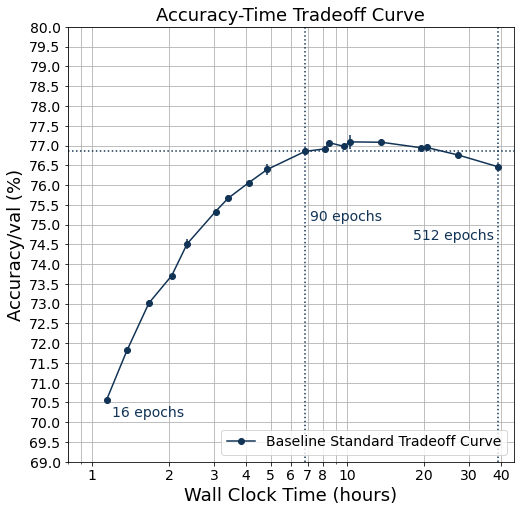

In [ ]:
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff Curve')
#fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Cyclic Learning Rate Tradeoff Curve')

fig = format_fig(fig,title='Accuracy-Time Tradeoff Curve')

plt.show()

if save:
  fig.savefig(folder+'/Baseline-noclr.pdf')
  print('saved in '+folder+'/Baseline-noclr.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674


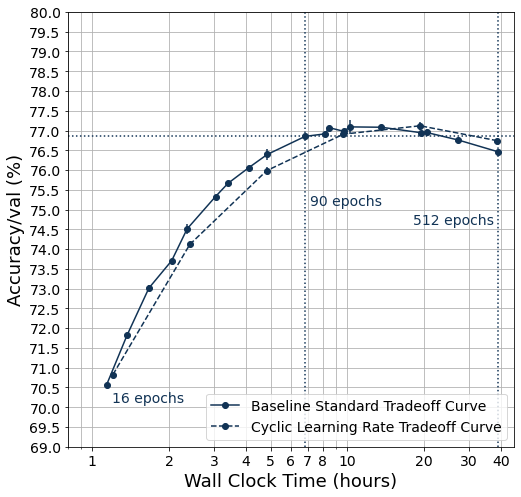

saved in ../Figures-2022-03-14/Baseline.pdf


In [ ]:
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff Curve')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Cyclic Learning Rate Tradeoff Curve')

fig = format_fig(fig)

plt.show()

if save:
  fig.savefig(folder+'/Baseline.pdf')
  print('saved in '+folder+'/Baseline.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
SSR: BlurPool final acc: 0.7642
CLR (mult): BlurPool final acc: 0.7657


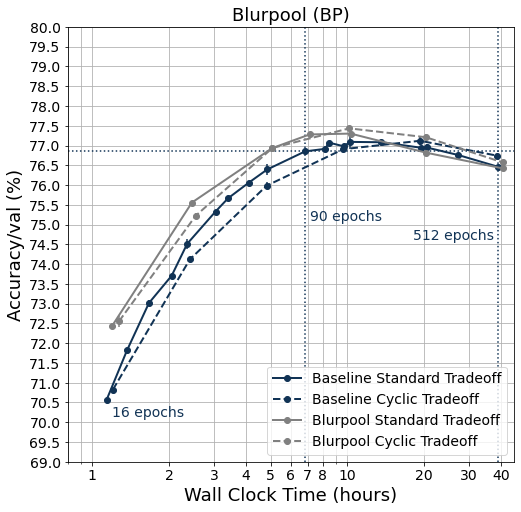

In [ ]:
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: BlurPool"],WCT_CORRECTED = False,fig=fig,color='gray',legend='Blurpool Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): BlurPool"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='gray',legend='Blurpool Cyclic Tradeoff')

fig = format_fig(fig,title='Blurpool (BP)')

plt.show()

if save:
  fig.savefig(folder+'/Blurpool.pdf')
  print('saved in '+folder+'/Blurpool.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
SSR: BlurPool final acc: 0.7642
CLR (mult): BlurPool final acc: 0.7657


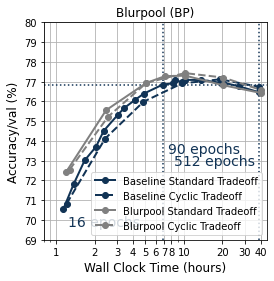

saved in ../Figures-2022-05-22/BP-small.pdf


In [ ]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
fig = plot_pareto(df_ssr_baseline,fig=fig,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: BlurPool"],WCT_CORRECTED = False,fig=fig,color='gray',legend='Blurpool Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): BlurPool"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='gray',legend='Blurpool Cyclic Tradeoff')

fig = format_fig_small(fig,title='Blurpool (BP)')

plt.show()

if save:
  fig.savefig(folder+'/BP-small.pdf')
  print('saved in '+folder+'/BP-small.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
SSR: Channels Last final acc: 0.7633
CLR (mult): Channels Last final acc: 0.7696
29.126777182221414 76.22799873352051


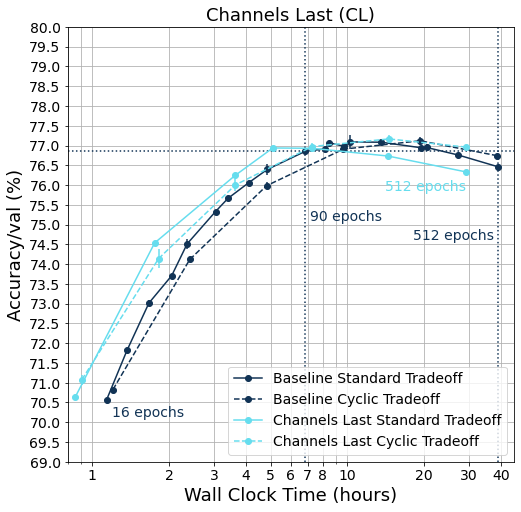

In [ ]:
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_clr_methods,fig=fig,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: Channels Last"],WCT_CORRECTED = False,fig=fig,color='#6de',legend='Channels Last Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Channels Last"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#6de',legend='Channels Last Cyclic Tradeoff')



WCT_CORRECTED = False
MAX_ACC = False
n = "512 epochs"
s = df_ssr_methods[1][2].loc["res50_ssr_5.69"]["wall_clock_train/corrected" if WCT_CORRECTED else "wall_clock_train"]
a = df_ssr_methods[1][2].loc["res50_ssr_5.69"]["max_acc/val" if MAX_ACC else "accuracy/val"]
fig.gca().annotate(n, (s/3600, a*1e2), horizontalalignment='right', verticalalignment='top',
                   xytext=(0, -4), textcoords='offset pixels',color='#6de',fontsize=14) #
print(s/3600,a*1e2)
fig = format_fig(fig,title='Channels Last (CL)')

plt.show()

if save:
  fig.savefig(folder+'/CL.pdf')
  print('saved in '+folder+'/CL.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
SSR: Channels Last final acc: 0.7633
CLR (mult): Channels Last final acc: 0.7696
29.126777182221414 76.22799873352051


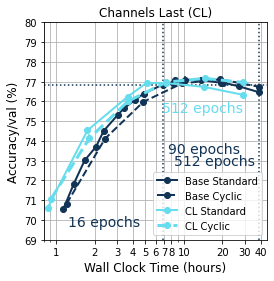

saved in ../Figures-2022-05-22/CL-small.pdf


In [ ]:
""" Small Version """

save=True

fig,ax = plt.subplots(1,1,figsize=(4,4))
fig = plot_pareto(df_ssr_baseline,fig=fig,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Base Standard',linewidth=2)
fig = plot_pareto(df_clr_methods,fig=fig,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,linestyle='--',color='#135',legend='Base Cyclic',linewidth=2)

fig = plot_pareto(df_ssr_methods,name_list=["SSR: Channels Last"],WCT_CORRECTED = False,fig=fig,color='#6de',legend='CL Standard',linewidth=2)
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Channels Last"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#6de',legend='CL Cyclic',linewidth=3)



WCT_CORRECTED = False
MAX_ACC = False
n = "512 epochs"
s = df_ssr_methods[1][2].loc["res50_ssr_5.69"]["wall_clock_train/corrected" if WCT_CORRECTED else "wall_clock_train"]
a = df_ssr_methods[1][2].loc["res50_ssr_5.69"]["max_acc/val" if MAX_ACC else "accuracy/val"]
fig.gca().annotate(n, (s/3600, a*1e2), horizontalalignment='right', verticalalignment='top',
                   xytext=(0, -4), textcoords='offset pixels',color='#6de',fontsize=14) #
print(s/3600,a*1e2)
fig = format_fig_small(fig,title='Channels Last (CL)')

plt.show()

if save:
  fig.savefig(folder+'/CL-small.pdf')
  print('saved in '+folder+'/CL-small.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
drop res50_ssr_0.1
SSR: Label Smoothing final acc: 0.7785
CLR (mult): Label Smoothing final acc: 0.7773


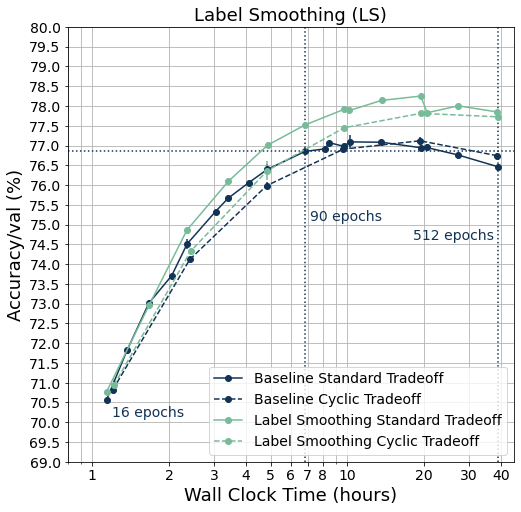

saved in ../Figures-2022-03-14/LS.pdf


In [ ]:
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: Label Smoothing"],WCT_CORRECTED = False,fig=fig,color='#7b9',legend='Label Smoothing Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Label Smoothing"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#7b9',legend='Label Smoothing Cyclic Tradeoff')

fig = format_fig(fig,title='Label Smoothing (LS)')

plt.show()

if save:
  fig.savefig(folder+'/LS.pdf')
  print('saved in '+folder+'/LS.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
drop res50_ssr_0.1
SSR: Label Smoothing final acc: 0.7785
CLR (mult): Label Smoothing final acc: 0.7773


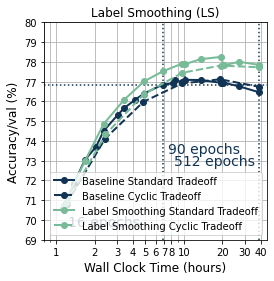

saved in ../Figures-2022-05-22/LS-small.pdf


In [ ]:
""" Small Version """

save=True

fig,ax = plt.subplots(1,1,figsize=(4,4))

fig = plot_pareto(df_ssr_baseline,fig=fig,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: Label Smoothing"],WCT_CORRECTED = False,fig=fig,color='#7b9',legend='Label Smoothing Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Label Smoothing"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#7b9',legend='Label Smoothing Cyclic Tradeoff')

fig = format_fig_small(fig,title='Label Smoothing (LS)')

plt.show()

if save:
  fig.savefig(folder+'/LS-small.pdf')
  print('saved in '+folder+'/LS-small.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
drop res50_ssr_0.1
SSR: MixUp final acc: 0.7851
CLR (mult): MixUp final acc: 0.7838


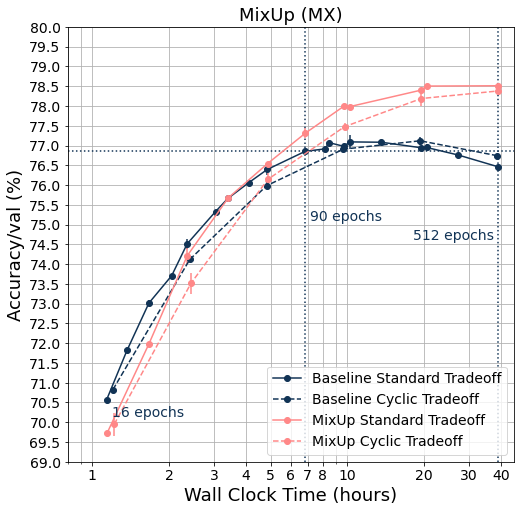

saved in ../Figures-2022-03-14/MX.pdf


In [ ]:
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: MixUp"],WCT_CORRECTED = False,fig=fig,color='#f88',legend='MixUp Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): MixUp"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#f88',legend='MixUp Cyclic Tradeoff')

fig = format_fig(fig,title='MixUp (MX)')

plt.show()

if save:
  fig.savefig(folder+'/MX.pdf')
  print('saved in '+folder+'/MX.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
drop res50_ssr_0.1
SSR: MixUp final acc: 0.7851
CLR (mult): MixUp final acc: 0.7838


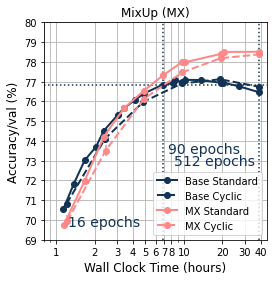

saved in ../Figures-2022-05-22/MX-small.pdf


In [ ]:
""" Small Format """
save = True

fig,ax= plt.subplots(1,1,figsize=(4,4))
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,fig=fig,color='#135',legend='Base Standard')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Base Cyclic')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: MixUp"],WCT_CORRECTED = False,fig=fig,color='#f88',legend='MX Standard')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): MixUp"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#f88',legend='MX Cyclic')

fig = format_fig_small(fig,title='MixUp (MX)')

plt.show()

if save:
  fig.savefig(folder+'/MX-small.pdf')
  print('saved in '+folder+'/MX-small.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
SSR: BP + CL final acc: 0.7645
CLR (mult): BP + CL final acc: 0.7650


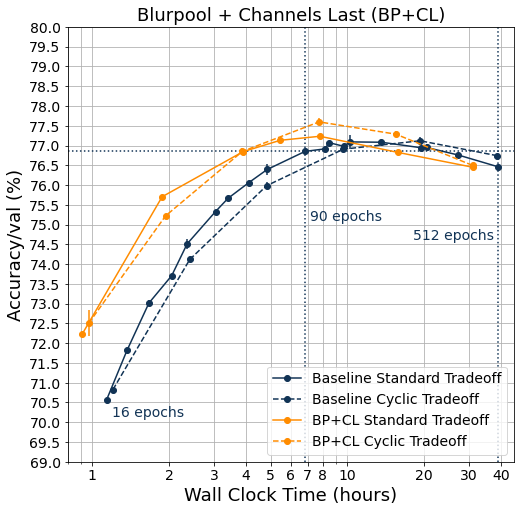

saved in ../Figures-2022-03-14/BP+CL.pdf


In [ ]:
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: BP + CL"],WCT_CORRECTED = False,fig=fig,color='darkorange',legend='BP+CL Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): BP + CL"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='darkorange',legend='BP+CL Cyclic Tradeoff')

fig = format_fig(fig,title='Blurpool + Channels Last (BP+CL)')

plt.show()

if save:
  fig.savefig(folder+'/BP+CL.pdf')
  print('saved in '+folder+'/BP+CL.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
SSR: BP + CL final acc: 0.7645
CLR (mult): BP + CL final acc: 0.7650


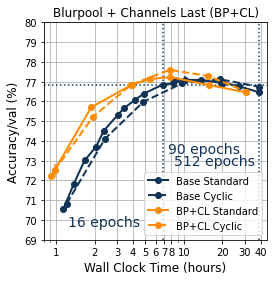

saved in ../Figures-2022-05-22/BP+CL-small.pdf


In [ ]:
""" Small Format """
save = True

fig,ax = plt.subplots(1,1,figsize=(4,4))
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,fig=fig,color='#135',legend='Base Standard')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Base Cyclic')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: BP + CL"],WCT_CORRECTED = False,fig=fig,color='darkorange',legend='BP+CL Standard')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): BP + CL"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='darkorange',legend='BP+CL Cyclic')

fig = format_fig_small(fig,title='Blurpool + Channels Last (BP+CL)')

plt.show()

if save:
  fig.savefig(folder+'/BP+CL-small.pdf')
  print('saved in '+folder+'/BP+CL-small.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
drop res50_ssr_0.1
SSR: LS + MX final acc: 0.7881
CLR (mult): LS + MX final acc: 0.7853


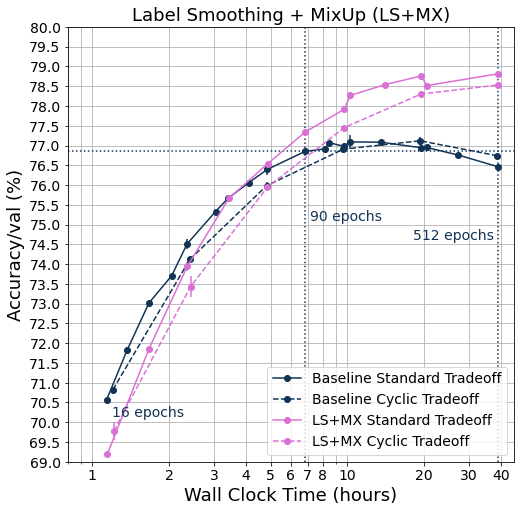

saved in ../Figures-2022-03-14/LS+MX.pdf


In [ ]:
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: LS + MX"],WCT_CORRECTED = False,fig=fig,color='orchid',legend='LS+MX Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): LS + MX"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='orchid',legend='LS+MX Cyclic Tradeoff')

fig = format_fig(fig,title='Label Smoothing + MixUp (LS+MX)') # note change in ylim for this plot...

plt.show()

if save:
  fig.savefig(folder+'/LS+MX.pdf')
  print('saved in '+folder+'/LS+MX.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
drop res50_ssr_0.1
SSR: LS + MX final acc: 0.7881
CLR (mult): LS + MX final acc: 0.7853


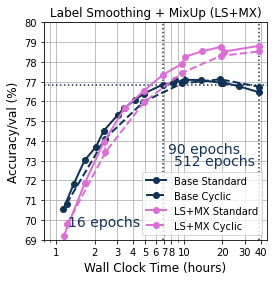

saved in ../Figures-2022-05-22/LS+MX-small.pdf


In [ ]:
""" Small Format """
save = True

fig,ax = plt.subplots(1,1,figsize=(4,4))
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,fig=fig,color='#135',legend='Base Standard')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Base Cyclic')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: LS + MX"],WCT_CORRECTED = False,fig=fig,color='orchid',legend='LS+MX Standard')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): LS + MX"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='orchid',legend='LS+MX Cyclic')

fig = format_fig_small(fig,title='Label Smoothing + MixUp (LS+MX)') # note change in ylim for this plot...

plt.show()

if save:
  fig.savefig(folder+'/LS+MX-small.pdf')
  print('saved in '+folder+'/LS+MX-small.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
SSR: BP + CL + LS + MX final acc: 0.7867
CLR (mult): BP + CL + LS + MX final acc: 0.7890


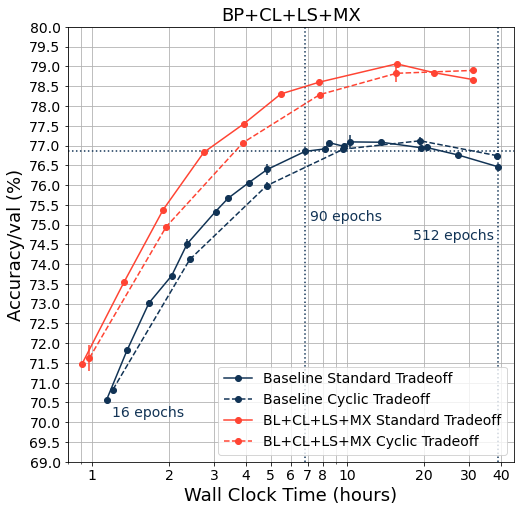

saved in ../Figures-2022-03-14/BP+CL+LS+MX.pdf


In [ ]:
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: BP + CL + LS + MX"],WCT_CORRECTED = False,fig=fig,color='#f43',legend='BL+CL+LS+MX Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): BP + CL + LS + MX"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#f43',legend='BL+CL+LS+MX Cyclic Tradeoff')

# WCT_CORRECTED = False
# MAX_ACC = False
# n = "512 epochs"
# s = df_clr_methods[10][2].loc["res50_cwr_T0_8ep_Tmult_2-5"]["wall_clock_train/corrected" if WCT_CORRECTED else "wall_clock_train"]
# a = df_clr_methods[10][2].loc["res50_cwr_T0_8ep_Tmult_2-5"]["max_acc/val" if MAX_ACC else "acc/val"] # acc/val for CLR =/
# fig.gca().annotate(n, (s/(60*60), a*1e2), horizontalalignment='right', verticalalignment='top',
#                    xytext=(40, -10), textcoords='offset pixels',color=df_clr_methods[10][3],fontsize=14) #


fig = format_fig(fig,title='BP+CL+LS+MX')

plt.show()

if save:
  fig.savefig(folder+'/BP+CL+LS+MX.pdf')
  print('saved in '+folder+'/BP+CL+LS+MX.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
CLR (mult): Baseline final acc: 0.7674
SSR: BP + CL + LS + MX final acc: 0.7867
CLR (mult): BP + CL + LS + MX final acc: 0.7890


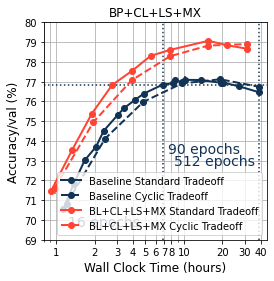

saved in ../Figures-2022-05-22/BP+CL+LS+MX.pdf


In [ ]:
save = True

fig,ax = plt.subplots(1,1,figsize=(4,4))
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,fig=fig,color='#135',legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: BP + CL + LS + MX"],WCT_CORRECTED = False,fig=fig,color='#f43',legend='BL+CL+LS+MX Standard Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): BP + CL + LS + MX"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#f43',legend='BL+CL+LS+MX Cyclic Tradeoff')

fig = format_fig_small(fig,title='BP+CL+LS+MX')

plt.show()

if save:
  fig.savefig(folder+'/BP+CL+LS+MX.pdf')
  print('saved in '+folder+'/BP+CL+LS+MX.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
SSR: BP + CL + LS + MX final acc: 0.7867


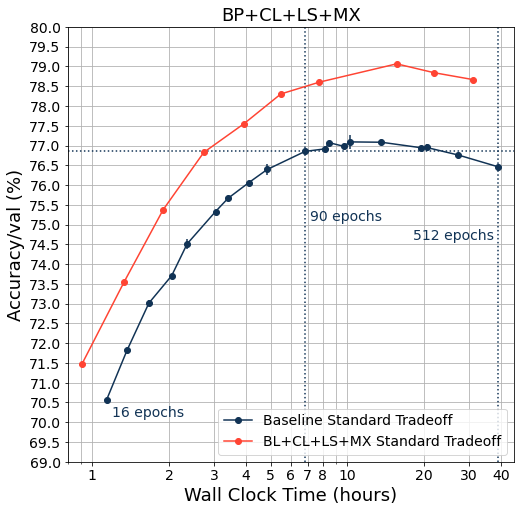

saved in ../Figures-2022-03-14/BP+CL+LS+MX-Intro-Standard-Only.pdf


In [ ]:
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color='#135',legend='Baseline Standard Tradeoff')
#fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#135',legend='Baseline Cyclic Tradeoff')

fig = plot_pareto(df_ssr_methods,name_list=["SSR: BP + CL + LS + MX"],WCT_CORRECTED = False,fig=fig,color='#f43',legend='BL+CL+LS+MX Standard Tradeoff')
#fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): BP + CL + LS + MX"],WCT_CORRECTED = False,fig=fig,linestyle='--',color='#f43',legend='BL+CL+LS+MX Cyclic Tradeoff')

# WCT_CORRECTED = False
# MAX_ACC = False
# n = "512 epochs"
# s = df_clr_methods[10][2].loc["res50_cwr_T0_8ep_Tmult_2-5"]["wall_clock_train/corrected" if WCT_CORRECTED else "wall_clock_train"]
# a = df_clr_methods[10][2].loc["res50_cwr_T0_8ep_Tmult_2-5"]["max_acc/val" if MAX_ACC else "acc/val"] # acc/val for CLR =/
# fig.gca().annotate(n, (s/(60*60), a*1e2), horizontalalignment='right', verticalalignment='top',
#                    xytext=(40, -10), textcoords='offset pixels',color=df_clr_methods[10][3],fontsize=14) #


fig = format_fig(fig,title='BP+CL+LS+MX')

plt.show()

if save:
  fig.savefig(folder+'/BP+CL+LS+MX-Intro-Standard-Only.pdf')
  print('saved in '+folder+'/BP+CL+LS+MX-Intro-Standard-Only.pdf')

drop res50_ssr_0.1
SSR: Baseline final acc: 0.7646
SSR: BlurPool final acc: 0.7642
SSR: Channels Last final acc: 0.7633
drop res50_ssr_0.1
SSR: MixUp final acc: 0.7851
drop res50_ssr_0.1
SSR: Label Smoothing final acc: 0.7785
SSR: BP + CL final acc: 0.7645
drop res50_ssr_0.1
SSR: LS + MX final acc: 0.7881
SSR: BP + CL + LS + MX final acc: 0.7867


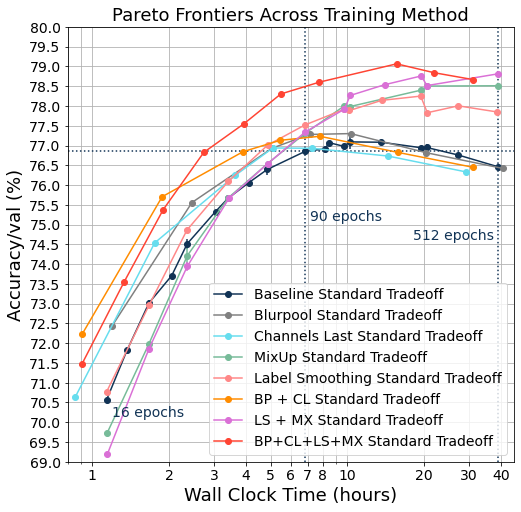

saved in ../Figures-2022-03-14/All-SSR.pdf


In [ ]:
c = ['#135','grey','#6de','#7b9','#f88','darkorange','orchid','#f43']
fig = plot_pareto(df_ssr_baseline,name_list=["SSR: Baseline"],WCT_CORRECTED = False,color=c[0],legend='Baseline Standard Tradeoff')
fig = plot_pareto(df_ssr_methods,name_list=["SSR: BlurPool"],WCT_CORRECTED = False,fig=fig,color=c[1],legend='Blurpool Standard Tradeoff')
fig = plot_pareto(df_ssr_methods,name_list=["SSR: Channels Last"],WCT_CORRECTED = False,fig=fig,color=c[2],legend='Channels Last Standard Tradeoff')
fig = plot_pareto(df_ssr_methods,name_list=["SSR: MixUp"],WCT_CORRECTED = False,fig=fig,color=c[3],legend='MixUp Standard Tradeoff')
fig = plot_pareto(df_ssr_methods,name_list=["SSR: Label Smoothing"],WCT_CORRECTED = False,fig=fig,color=c[4],legend='Label Smoothing Standard Tradeoff')
fig = plot_pareto(df_ssr_methods,name_list=["SSR: BP + CL"],WCT_CORRECTED = False,fig=fig,color=c[5],legend='BP + CL Standard Tradeoff')
fig = plot_pareto(df_ssr_methods,name_list=["SSR: LS + MX"],WCT_CORRECTED = False,fig=fig,color=c[6],legend='LS + MX Standard Tradeoff')
fig = plot_pareto(df_ssr_methods,name_list=["SSR: BP + CL + LS + MX"],WCT_CORRECTED = False,fig=fig,color=c[7],legend='BP+CL+LS+MX Standard Tradeoff')

fig = format_fig(fig,title='Pareto Frontiers Across Training Method')

plt.show()

if save:
  fig.savefig(folder+'/All-SSR.pdf')
  print('saved in '+folder+'/All-SSR.pdf')

CLR (mult): Baseline final acc: 0.7674
CLR (mult): BlurPool final acc: 0.7657
CLR (mult): Channels Last final acc: 0.7696
CLR (mult): MixUp final acc: 0.7838
CLR (mult): Label Smoothing final acc: 0.7773
CLR (mult): BP + CL final acc: 0.7650
CLR (mult): LS + MX final acc: 0.7853
CLR (mult): BP + CL + LS + MX final acc: 0.7890


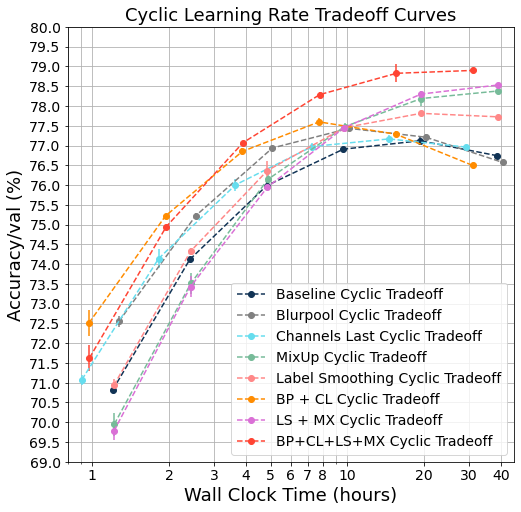

saved in ../Figures-2022-03-14/All-CLR.pdf


In [ ]:
c = ['#135','grey','#6de','#7b9','#f88','darkorange','orchid','#f43']
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Baseline"],WCT_CORRECTED = False,linestyle='--',color=c[0],legend='Baseline Cyclic Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): BlurPool"],WCT_CORRECTED = False,fig=fig,linestyle='--',color=c[1],legend='Blurpool Cyclic Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Channels Last"],WCT_CORRECTED = False,fig=fig,linestyle='--',color=c[2],legend='Channels Last Cyclic Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): MixUp"],WCT_CORRECTED = False,fig=fig,linestyle='--',color=c[3],legend='MixUp Cyclic Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): Label Smoothing"],WCT_CORRECTED = False,fig=fig,linestyle='--',color=c[4],legend='Label Smoothing Cyclic Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): BP + CL"],WCT_CORRECTED = False,fig=fig,linestyle='--',color=c[5],legend='BP + CL Cyclic Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): LS + MX"],WCT_CORRECTED = False,fig=fig,linestyle='--',color=c[6],legend='LS + MX Cyclic Tradeoff')
fig = plot_pareto(df_clr_methods,name_list=["CLR (mult): BP + CL + LS + MX"],WCT_CORRECTED = False,fig=fig,linestyle='--',color=c[7],legend='BP+CL+LS+MX Cyclic Tradeoff')

fig = format_fig(fig,title='Cyclic Learning Rate Tradeoff Curves')

plt.show()

if save:
  fig.savefig(folder+'/All-CLR.pdf')
  print('saved in '+folder+'/All-CLR.pdf')

# Calculate Wall Clock Time (and plot)

In [ ]:
# calculate wall clock time for CLR method

df_clr_methods[0][2]['wall_clock_train'].values[-1] # last value, 512 epochs

139436.15458083153

In [ ]:
""" CLR WCT TOTAL """
clr_dict={}
for i in range(len(df_clr_methods)):

  name = df_clr_methods[i][0]

  wct_total = df_clr_methods[i][2]['wall_clock_train'].values[-1]

  clr_dict[name] = wct_total

In [ ]:
df_ssr_baseline[0]

('SSR: Baseline',
 'i1k_ssr_baseline',
                  wall_clock_train  accuracy/val  max_acc/val         lr-sum  \
 name                                                                          
 res50_ssr_0.1         2456.736414       0.64989      0.64989    5760.000000   
 res50_ssr_0.175       4093.877979       0.70564      0.70564   10071.881075   
 res50_ssr_0.2         4922.526619       0.71816      0.71816   11520.000000   
 res50_ssr_0.25        6002.115823       0.73015      0.73015   14398.862403   
 res50_ssr_0.3         7371.543765       0.73708      0.73708   17280.000000   
 res50_ssr_0.355       8475.763630       0.74513      0.74513   20445.661472   
 res50_ssr_0.45       10951.715781       0.75330      0.75330   25919.363422   
 res50_ssr_0.5        12256.228611       0.75657      0.75664   28800.000000   
 res50_ssr_0.6        14780.711302       0.76060      0.76060   34560.000000   
 res50_ssr_0.715      17461.455745       0.76342      0.76394   41183.217833   
 

In [ ]:


ssr_dict={}

name = df_ssr_baseline[0][0]

wct_total = 0
for row in ['res50_ssr_0.175','res50_ssr_0.355','res50_ssr_0.715','res50_ssr_1.425','res50_ssr_2.845','res50_ssr_5.69']:
  wct_total += df_ssr_baseline[0][2].loc[row]['wall_clock_train']

ssr_dict[name] = wct_total

for i in range(len(df_ssr_methods)):

  name = df_ssr_methods[i][0]

  wct_total = 0
  for row in ['res50_ssr_0.175','res50_ssr_0.355','res50_ssr_0.715','res50_ssr_1.425','res50_ssr_2.845','res50_ssr_5.69']:
    wct_total += df_ssr_methods[i][2].loc[row]['wall_clock_train']

  ssr_dict[name] = wct_total

In [ ]:
for i in range(11):
  print(df_clr_methods[i][0],df_clr_methods[i][3])

CLR (mult): Baseline k
CLR (mult): BlurPool sandybrown
CLR (mult): Channels Last grey
CLR (mult): Label Smoothing lawngreen
CLR (mult): MixUp orchid
CLR (mult): BP + CL firebrick
CLR (mult): CL + LS goldenrod
CLR (mult): CL + MX indigo
CLR (mult): LS + MX cyan
CLR (mult): CL + LS + MX magenta
CLR (mult): BP + CL + LS + MX midnightblue


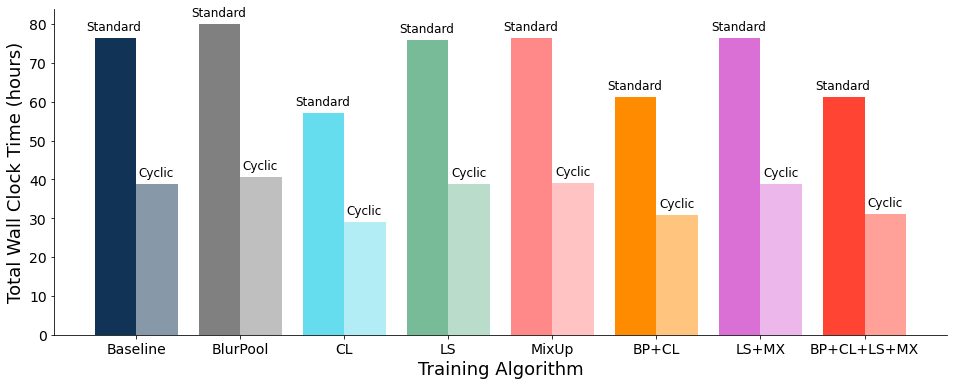

saved in ../Figures-2022-05-22/WCT-All.pdf


In [ ]:
ssr_dict.keys()


fig,ax = plt.subplots(1,1,figsize=(16,6))

denom = 60*60
# keys = ssr_dict.keys()
# vals = np.asarray(list(ssr_dict.values()))/denom
# ax.bar(keys,vals)



# Methods
method_list = ['Baseline','BlurPool','Channels Last','Label Smoothing','MixUp','BP + CL','LS + MX','BP + CL + LS + MX']
color_list = ['k','sandybrown','grey','lawngreen','orchid','firebrick','cyan','midnightblue']
color_list = ['#135','grey','#6de','#7b9','#f88','darkorange','orchid','#f43']
for i,method in enumerate(method_list):
  key = [item for item in list(ssr_dict.keys()) if method in item][0]
  ax.bar(i-0.2,ssr_dict[key]/denom,width=0.4,color=color_list[i])

  ax.text(x = i-0.475 , y = ssr_dict[key]/denom+2, s = 'Standard', size = 12)

  key = [item for item in list(clr_dict.keys()) if method in item][0]
  ax.bar(i+0.2,clr_dict[key]/denom,width=0.4,color=color_list[i],alpha=0.5,linewidth=4) #,'fill=False,'

  # Text on the top of each bar
  ax.text(x = i+0.025 , y = clr_dict[key]/denom+2, s = 'Cyclic', size = 12)



fntsz1=18
fntsz2=14
ax.set_xticks(np.arange(0,8,1))
method_list2 = ['Baseline','BlurPool','CL','LS','MixUp','BP+CL','LS+MX','BP+CL+LS+MX']
ax.set_xticklabels(method_list2,Fontsize=fntsz1) # ,rotation = 20
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Total Wall Clock Time (hours)',fontsize=fntsz1)
ax.set_xlabel('Training Algorithm',fontsize=fntsz1)

ax.tick_params(axis='x', labelsize=fntsz2)
ax.tick_params(axis='y', labelsize=fntsz2)

plt.show()

if save:
  fig.savefig(folder+'/WCT-All.pdf')
  print('saved in '+folder+'/WCT-All.pdf')

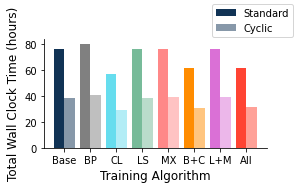

In [ ]:
""" Small Version """

save = False
ssr_dict.keys()


fig,ax = plt.subplots(1,1,figsize=(4,2))

denom = 60*60
# keys = ssr_dict.keys()
# vals = np.asarray(list(ssr_dict.values()))/denom
# ax.bar(keys,vals)



# Methods
method_list = ['Baseline','BlurPool','Channels Last','Label Smoothing','MixUp','BP + CL','LS + MX','BP + CL + LS + MX']
color_list = ['k','sandybrown','grey','lawngreen','orchid','firebrick','cyan','midnightblue']
color_list = ['#135','grey','#6de','#7b9','#f88','darkorange','orchid','#f43']
for i,method in enumerate(method_list):
  key = [item for item in list(ssr_dict.keys()) if method in item][0]
  ax.bar(i-0.2,ssr_dict[key]/denom,width=0.4,color=color_list[i])

  #ax.text(x = i-0.475 , y = ssr_dict[key]/denom+2, s = 'Standard', size = 12)

  key = [item for item in list(clr_dict.keys()) if method in item][0]
  ax.bar(i+0.2,clr_dict[key]/denom,width=0.4,color=color_list[i],alpha=0.5,linewidth=4) #,'fill=False,'

  # Text on the top of each bar
 #ax.text(x = i+0.025 , y = clr_dict[key]/denom+2, s = 'Cyclic', size = 12)



fntsz1=12
fntsz2=10
ax.set_xticks(np.arange(0,8,1))
method_list2 = ['Base','BP','CL','LS','MX','B+C','L+M','All']
ax.set_xticklabels(method_list2,Fontsize=fntsz1) # ,rotation = 20
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Total Wall Clock Time (hours)',fontsize=fntsz1)
ax.set_xlabel('Training Algorithm',fontsize=fntsz1)

ax.tick_params(axis='x', labelsize=fntsz2)
ax.tick_params(axis='y', labelsize=fntsz2)
fig.legend(['Standard','Cyclic'],fontsize=fntsz2)

plt.show()

if save:
  fig.savefig(folder+'/WCT-All-small.pdf')
  print('saved in '+folder+'/WCT-All-small.pdf')

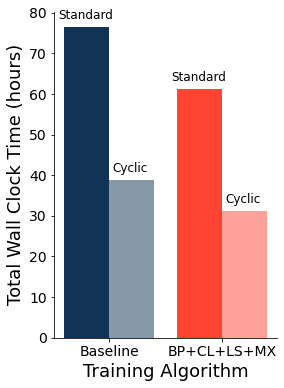

saved in ../Figures-2022-03-14/WCT-BP+CL+LS+MX.pdf


In [ ]:
ssr_dict.keys()


fig,ax = plt.subplots(1,1,figsize=(4,6))

denom = 60*60
# keys = ssr_dict.keys()
# vals = np.asarray(list(ssr_dict.values()))/denom
# ax.bar(keys,vals)



# Methods
method_list = ['Baseline','BP + CL + LS + MX']
color_list = ['#135','#f43']
for i,method in enumerate(method_list):
  key = [item for item in list(ssr_dict.keys()) if method in item][0]
  ax.bar(i-0.2,ssr_dict[key]/denom,width=0.4,color=color_list[i])

  ax.text(x = i-0.45 , y = ssr_dict[key]/denom+2, s = 'Standard', size = 12)

  key = [item for item in list(clr_dict.keys()) if method in item][0]
  ax.bar(i+0.2,clr_dict[key]/denom,width=0.4,color=color_list[i],alpha=0.5,linewidth=4) #,'fill=False,'

  # Text on the top of each bar
  ax.text(x = i+0.0275 , y = clr_dict[key]/denom+2, s = 'Cyclic', size = 12)



fntsz1=18
fntsz2=14
method_list2 = ['Baseline','BP+CL+LS+MX']
ax.set_xticks(np.arange(0,2,1))
ax.set_xticklabels(method_list2,fontsize=fntsz1) #,rotation = 20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Total Wall Clock Time (hours)',fontsize=fntsz1)
ax.set_xlabel('Training Algorithm',fontsize=fntsz1)

ax.tick_params(axis='x', labelsize=fntsz2)
ax.tick_params(axis='y', labelsize=fntsz2)

plt.show()

if save:
  fig.savefig(folder+'/WCT-BP+CL+LS+MX.pdf')
  print('saved in '+folder+'/WCT-BP+CL+LS+MX.pdf')

In [ ]:
mask =['BlurPool' in item for item in list(ssr_dict.keys())]
key = list(ssr_dict.keys())[mask] 

TypeError: ignored

# Calculate Cosine Similarity between Accuracy Differences

In [ ]:
""" Calculate Total Change in Accuracy Between Methods """



ssr_improvements={}

name = df_ssr_baseline[0][0]

accuracy_vec = []
for row in ['res50_ssr_0.175','res50_ssr_0.355','res50_ssr_0.715','res50_ssr_1.425','res50_ssr_2.845','res50_ssr_5.69']:
  accuracy_vec.append(df_ssr_baseline[0][2].loc[row]['max_acc/val'])

ssr_improvements[name] = np.asarray(accuracy_vec)

for i in range(len(df_ssr_methods)):

  name = df_ssr_methods[i][0]

  accuracy_vec = []
  for row in ['res50_ssr_0.175','res50_ssr_0.355','res50_ssr_0.715','res50_ssr_1.425','res50_ssr_2.845','res50_ssr_5.69']:
    accuracy_vec.append(df_ssr_methods[i][2].loc[row]['max_acc/val'])

  ssr_improvements[name] = np.asarray(accuracy_vec)

In [ ]:
 ssr_improvements['SSR: Baseline']

array([0.70564002, 0.74513   , 0.76394001, 0.76977   , 0.76944   ,
       0.76463997])

In [ ]:
""" CLR WCT TOTAL """
clr_improvements={}
for i in range(len(df_clr_methods)):

  name = df_clr_methods[i][0]

  accuracy_vec = df_clr_methods[i][2]['max_acc/val'].to_numpy()

  print(name,accuracy_vec)
  clr_improvements[name] = accuracy_vec

CLR (mult): Baseline [0.70828    0.74118    0.75983    0.76908001 0.7712     0.76741999]
CLR (mult): BlurPool [0.72552001 0.75224    0.76938    0.77434    0.7721     0.76573998]
CLR (mult): Channels Last [0.71077999 0.74141002 0.76003999 0.76975    0.77167001 0.76962   ]
CLR (mult): Label Smoothing [0.70932999 0.74327001 0.76368001 0.77450001 0.77814001 0.77726001]
CLR (mult): MixUp [0.69948    0.73515999 0.76141998 0.77476999 0.78189    0.78380001]
CLR (mult): BP + CL [0.72507998 0.75222    0.76850998 0.77598    0.77287    0.76498002]
CLR (mult): CL + LS [0.71057999 0.74430001 0.76198    0.77473998 0.77847999]
CLR (mult): CL + MX [0.69752002 0.73842001 0.76029998 0.77388    0.78175998]
CLR (mult): LS + MX [0.69777998 0.73433    0.75948    0.77452999 0.78301999 0.78530002]
CLR (mult): CL + LS + MX [0.69392002 0.73813999 0.75999999 0.77323997 0.78097999]
CLR (mult): BP + CL + LS + MX [0.71626002 0.74946001 0.77071002 0.78286999 0.78827    0.78899997]


In [ ]:
""" Calculate Difference in CLR Estimation 

unfortunately the first point is not aligned, so I am doing calculation over [1:]
"""

""" Baseline """
bs_dif = np.mean(ssr_improvements['SSR: Baseline'][1:] - clr_improvements['CLR (mult): Baseline'][1:])
print('Baseline {:.4f}'.format(bs_dif*1e2))

""" Blurpool """
bp_dif = np.mean(ssr_improvements['SSR: BlurPool'][1:] - clr_improvements['CLR (mult): BlurPool'][1:])
print('BP {:.4f}'.format(bp_dif*1e2))

""" Channels Last """
cl_dif = np.mean(ssr_improvements['SSR: Channels Last'][1:] - clr_improvements['CLR (mult): Channels Last'][1:])
print('CL {:.4f}'.format(cl_dif*1e2))

""" Label Smoothing """
ls_dif = np.mean(ssr_improvements['SSR: Label Smoothing'][1:] - clr_improvements['CLR (mult): Label Smoothing'][1:])
print('LS {:.4f}'.format(ls_dif*1e2))

""" MixUp """
mx_dif = np.mean(ssr_improvements['SSR: MixUp'][1:] - clr_improvements['CLR (mult): MixUp'][1:])
print('MX {:.4f}'.format(mx_dif*1e2))

""" BP + CL """
bpcl_dif = np.mean(ssr_improvements['SSR: BP + CL'][1:] - clr_improvements['CLR (mult): BP + CL'][1:])
print('BP+CL {:.4f}'.format(bpcl_dif*1e2))

""" LS + MX"""
lsmx_dif = np.mean(ssr_improvements['SSR: LS + MX'][1:] - clr_improvements['CLR (mult): LS + MX'][1:])
print('LS+MX {:.4f}'.format(lsmx_dif*1e2))

""" BP+CL+LS+MX """
bpcllsmx_dif = np.mean(ssr_improvements['SSR: BP + CL + LS + MX'][1:] - clr_improvements['CLR (mult): BP + CL + LS + MX'][1:])
print('BP+CL+LS+MX {:.4f}'.format(bpcllsmx_dif*1e2))

Baseline 0.0842
BP -0.0688
CL -0.0942
LS 0.4398
MX 0.3928
BP+CL -0.0796
LS+MX 0.4614
BP+CL+LS+MX 0.2474


In [ ]:
def cos_sim(a,b):
  return np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
  

""" Blurpool """
bp_bs_ssr = ssr_improvements['SSR: BlurPool'] - ssr_improvements['SSR: Baseline']
bp_bs_clr = clr_improvements['CLR (mult): BlurPool'] - clr_improvements['CLR (mult): Baseline']

bp_bs_sim = cos_sim(bp_bs_ssr,bp_bs_clr)
#print('BP:{:.3f}'.format(bp_bs_sim))

bp_bs_corr = np.corrcoef(bp_bs_ssr,bp_bs_clr)
print('BP corr:{:.3f}'.format(bp_bs_corr[0,1]))

""" Channels Last """
cl_bs_ssr = ssr_improvements['SSR: Channels Last'] - ssr_improvements['SSR: Baseline']
cl_bs_clr = clr_improvements['CLR (mult): Channels Last'] - clr_improvements['CLR (mult): Baseline']

cl_bs_sim = cos_sim(cl_bs_ssr,cl_bs_clr)
#print('CL:{:.3f}'.format(cl_bs_sim))

cl_bs_corr = np.corrcoef(cl_bs_ssr,cl_bs_clr)
print('CL corr:{:.3f}'.format(cl_bs_corr[0,1]))

""" Label Smoothing """
ls_bs_ssr = ssr_improvements['SSR: Label Smoothing'] - ssr_improvements['SSR: Baseline']
ls_bs_clr = clr_improvements['CLR (mult): Label Smoothing'] - clr_improvements['CLR (mult): Baseline']

ls_bs_sim = cos_sim(ls_bs_ssr,ls_bs_clr)
#print('LS:{:.3f}'.format(ls_bs_sim))

ls_bs_corr = np.corrcoef(ls_bs_ssr,ls_bs_clr)
print('LS corr:{:.3f}'.format(ls_bs_corr[0,1]))

""" MixUp """
mx_bs_ssr = ssr_improvements['SSR: MixUp'] - ssr_improvements['SSR: Baseline']
mx_bs_clr = clr_improvements['CLR (mult): MixUp'] - clr_improvements['CLR (mult): Baseline']

mx_bs_sim = cos_sim(mx_bs_ssr,mx_bs_clr)
#print('MX:{:.3f}'.format(mx_bs_sim))

mx_bs_corr = np.corrcoef(mx_bs_ssr,mx_bs_clr)
print('MX corr:{:.3f}'.format(mx_bs_corr[0,1]))

""" BP+CL """
bpcl_bs_ssr = ssr_improvements['SSR: BP + CL'] - ssr_improvements['SSR: Baseline']
bpcl_bs_clr = clr_improvements['CLR (mult): BP + CL'] - clr_improvements['CLR (mult): Baseline']

bpcl_bs_sim = cos_sim(bpcl_bs_ssr,bpcl_bs_clr)
#print('BP+CL:{:.3f}'.format(bpcl_bs_sim))

bpcl_bs_corr = np.corrcoef(bpcl_bs_ssr,bpcl_bs_clr)
print('BP+CL corr:{:.3f}'.format(bpcl_bs_corr[0,1]))

""" LS+MX """
lsmx_bs_ssr = ssr_improvements['SSR: LS + MX'] - ssr_improvements['SSR: Baseline']
lsmx_bs_clr = clr_improvements['CLR (mult): LS + MX'] - clr_improvements['CLR (mult): Baseline']

lsmx_bs_sim = cos_sim(lsmx_bs_ssr,lsmx_bs_clr)
#print('LS+MX:{:.3f}'.format(lsmx_bs_sim))

lsmx_bs_corr = np.corrcoef(lsmx_bs_ssr,lsmx_bs_clr)
print('LS+MX corr:{:.3f}'.format(lsmx_bs_corr[0,1]))

""" BP+CL+LS+MX """
bpcllsmx_bs_ssr = ssr_improvements['SSR: BP + CL + LS + MX'] - ssr_improvements['SSR: Baseline']
bpcllsmx_bs_clr = clr_improvements['CLR (mult): BP + CL + LS + MX'] - clr_improvements['CLR (mult): Baseline']

bpcllsmx_bs_sim = cos_sim(bpcllsmx_bs_ssr,bpcllsmx_bs_clr)
#print('BP+CL+LS+MX:{:.3f}'.format(bpcllsmx_bs_sim))

bpcllsmx_bs_corr = np.corrcoef(bpcllsmx_bs_ssr,bpcllsmx_bs_clr)
print('BP+CL+LS+MX corr:{:.3f}'.format(bpcllsmx_bs_corr[0,1]))


BP corr:0.958
CL corr:0.345
LS corr:0.971
MX corr:0.990
BP+CL corr:0.920
LS+MX corr:0.995
BP+CL+LS+MX corr:0.971


In [ ]:
bp_bs_corr[0,1]

0.958070210898506

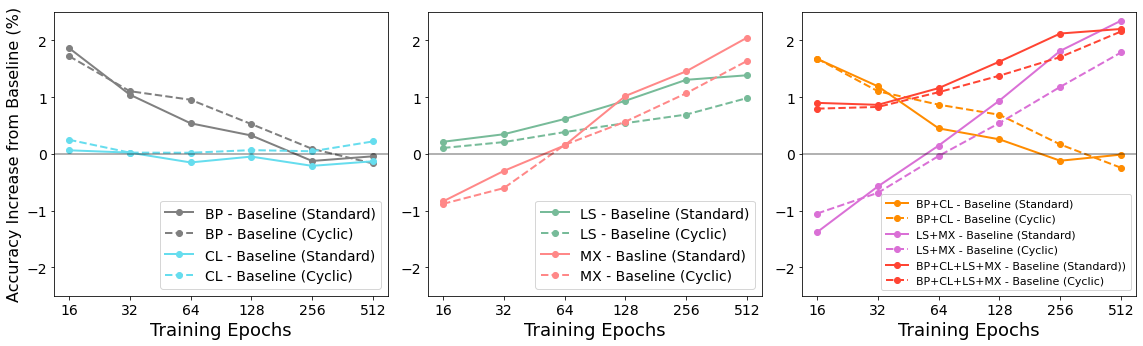

In [ ]:
c = ['#135','grey','#6de','#7b9','#f88','darkorange','orchid','#f43']
fntsz1=18
fntsz2=14
save = False

fig,ax = plt.subplots(1,3,figsize=(16,5))

ax[0].plot(bp_bs_ssr*1e2,'o-',color=c[1],label='BP - Baseline (Standard)',linewidth=2)
ax[0].plot(bp_bs_clr*1e2,'o--',color=c[1],label='BP - Baseline (Cyclic)',linewidth=2)

ax[0].plot(cl_bs_ssr*1e2,'o-',color=c[2],label='CL - Baseline (Standard)',linewidth=2)
ax[0].plot(cl_bs_clr*1e2,'o--',color=c[2],label='CL - Baseline (Cyclic)',linewidth=2)
#ax[0].set_title('Blurpool, Channels Last',fontsize=fntsz1)

ax[1].plot(ls_bs_ssr*1e2,'o-',color=c[3],label='LS - Baseline (Standard)',linewidth=2)
ax[1].plot(ls_bs_clr*1e2,'o--',color=c[3],label='LS - Baseline (Cyclic)',linewidth=2)

ax[1].plot(mx_bs_ssr*1e2,'o-',color=c[4],label='MX - Basline (Standard)',linewidth=2)
ax[1].plot(mx_bs_clr*1e2,'o--',color=c[4],label='MX - Baseline (Cyclic)',linewidth=2)

ax[2].plot(bpcl_bs_ssr*1e2,'o-',color=c[5],label='BP+CL - Baseline (Standard)',linewidth=2)
ax[2].plot(bpcl_bs_clr*1e2,'o--',color=c[5],label='BP+CL - Baseline (Cyclic)',linewidth=2)

ax[2].plot(lsmx_bs_ssr*1e2,'o-',color=c[6],label='LS+MX - Baseline (Standard)',linewidth=2)
ax[2].plot(lsmx_bs_clr*1e2,'o--',color=c[6],label='LS+MX - Baseline (Cyclic)',linewidth=2)

ax[2].plot(bpcllsmx_bs_ssr*1e2,'o-',color=c[7],label='BP+CL+LS+MX - Baseline (Standard))',linewidth=2)
ax[2].plot(bpcllsmx_bs_clr*1e2,'o--',color=c[7],label='BP+CL+LS+MX - Baseline (Cyclic)',linewidth=2)

ylim = [-2.5,2.5]

ax[0].set_ylabel('Accuracy Increase from Baseline (%)',fontsize=16)

for a in ax:
  a.set_ylim(ylim)
  a.legend(fontsize=fntsz2,loc=4)
  a.axhline(y=0,color='k',alpha=0.4)
  a.set_xticklabels(['','16','32','64','128','256','512'],fontsize=fntsz2)
  a.tick_params(labelsize= fntsz2)
  a.set_xlabel('Training Epochs',fontsize=fntsz1)

ax[2].legend(fontsize=11,loc=4) # loc='center left', bbox_to_anchor=(0.3, 0.2))


plt.tight_layout()

if save:
  fig.savefig(folder+'/cos-sim.pdf')
  print('saved in '+folder+'/cos-sim.pdf')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


saved in ../Figures-2022-05-22/cos-sim-small.pdf


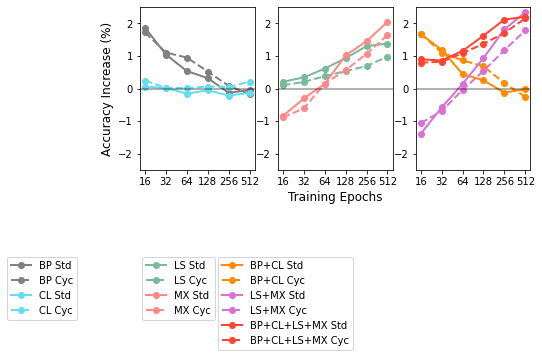

In [ ]:
""" Plot Small Version """

c = ['#135','grey','#6de','#7b9','#f88','darkorange','orchid','#f43']
fntsz1=12
fntsz2=10
save = True

fig,ax = plt.subplots(1,3,figsize=(7,3))

ax[0].plot(bp_bs_ssr*1e2,'o-',color=c[1],label='BP Std',linewidth=2)
ax[0].plot(bp_bs_clr*1e2,'o--',color=c[1],label='BP Cyc',linewidth=2)

ax[0].plot(cl_bs_ssr*1e2,'o-',color=c[2],label='CL Std',linewidth=2)
ax[0].plot(cl_bs_clr*1e2,'o--',color=c[2],label='CL Cyc',linewidth=2)
#ax[0].set_title('Blurpool, Channels Last',fontsize=fntsz1)

ax[1].plot(ls_bs_ssr*1e2,'o-',color=c[3],label='LS Std',linewidth=2)
ax[1].plot(ls_bs_clr*1e2,'o--',color=c[3],label='LS Cyc',linewidth=2)

ax[1].plot(mx_bs_ssr*1e2,'o-',color=c[4],label='MX Std',linewidth=2)
ax[1].plot(mx_bs_clr*1e2,'o--',color=c[4],label='MX Cyc',linewidth=2)

ax[2].plot(bpcl_bs_ssr*1e2,'o-',color=c[5],label='BP+CL Std',linewidth=2)
ax[2].plot(bpcl_bs_clr*1e2,'o--',color=c[5],label='BP+CL Cyc',linewidth=2)

ax[2].plot(lsmx_bs_ssr*1e2,'o-',color=c[6],label='LS+MX Std',linewidth=2)
ax[2].plot(lsmx_bs_clr*1e2,'o--',color=c[6],label='LS+MX Cyc',linewidth=2)

ax[2].plot(bpcllsmx_bs_ssr*1e2,'o-',color=c[7],label='BP+CL+LS+MX Std',linewidth=2)
ax[2].plot(bpcllsmx_bs_clr*1e2,'o--',color=c[7],label='BP+CL+LS+MX Cyc',linewidth=2)

ylim = [-2.5,2.5]

ax[0].set_ylabel('Accuracy Increase (%)',fontsize=fntsz1)

for a in ax:
  a.set_ylim(ylim)
  a.legend(fontsize=fntsz2,bbox_to_anchor=(-0.5,-0.5))
  a.axhline(y=0,color='k',alpha=0.4)
  
  a.tick_params(labelsize= fntsz2)
  a.set_xticks([0,1,2,3,4,5])
  a.set_xticklabels(['16','32','64','128','256','512'],fontsize=fntsz2)

ax[1].set_xlabel('Training Epochs',fontsize=fntsz1)

#ax[2].legend(fontsize=10,bbox_to_anchor=(0,-1)) # loc='center left', bbox_to_anchor=(0.3, 0.2))


fig.tight_layout()

if save:
  fig.savefig(folder+'/cos-sim-small.pdf')
  print('saved in '+folder+'/cos-sim-small.pdf')